In [26]:
import MDAnalysis as mda
u= mda.Universe('pp_chain_2_w1O_h2o.pdb', 'md_cat_pi_350_full_bb.xtc')
import numpy as np
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [5]:
len(u.trajectory)

48098

In [32]:
Rgyr=[]
time_li=[]
bb=u.select_atoms("name BB")
for ts in u.trajectory:
   Rgyr.append(bb.radius_of_gyration())
   time_li.append(u.trajectory.time)


               

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

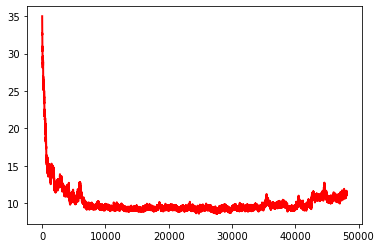

In [39]:
ax=plt.subplot(111)
ax.plot(time_li,Rgyr,'r',lw=2)
plt.show()

In [40]:
u.trajectory[50]


< Timestep 50 with unit cell dimensions [154.15907 154.15907 154.15907  90.       90.       90.     ] >

In [41]:
ts.frame

50

In [77]:
import numpy as np
import MDAnalysis.analysis.align
from MDAnalysisTests.datafiles import PSF, DCD

In [45]:
u = MDAnalysis.Universe(PSF,DCD)
ref= MDAnalysis.Universe(PSF,DCD)# copy of u
CORE_selection = "resid 1-29 or resid 60-121 or resid 160-214"
pdbtrj = "adk_distance_bfac.pdb"

In [47]:
u.add_TopologyAttr('tempfactors')
with MDAnalysis.Writer(pdbtrj, multiframe=True, bonds=None, n_atoms=u.atoms.n_atoms) as PDB:
 ref.trajectory[0]
 for ts in u.trajectory:
  rmsd = MDAnalysis.analysis.align.alignto(u.atoms, ref.atoms, select=CORE_selection)  
  distances = np.sqrt(np.sum((u.atoms.positions - ref.atoms.positions)**2, axis=1))
  u.atoms.tempfactors = distances
  PDB.write(u.atoms)
  print("Frame {0}: CORE RMSD before/after superposition: {1[0]:.1f} / {1[1]:.1f} A. "
              "min-max displacement: {2:.1f}...{3:.1f} A".format(ts.frame, rmsd, distances.min(), distances.max()))

print("Wrote PDB trajectory {0} with distances in bfactor field".format(pdbtrj))

/home/mjain123/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/mjain123/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/mjain123/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"


Frame 0: CORE RMSD before/after superposition: 0.0 / 0.0 A. min-max displacement: 0.0...0.0 A
Frame 1: CORE RMSD before/after superposition: 0.7 / 0.7 A. min-max displacement: 0.0...3.5 A
Frame 2: CORE RMSD before/after superposition: 0.8 / 0.8 A. min-max displacement: 0.0...3.6 A
Frame 3: CORE RMSD before/after superposition: 1.0 / 1.0 A. min-max displacement: 0.0...4.2 A
Frame 4: CORE RMSD before/after superposition: 1.1 / 1.0 A. min-max displacement: 0.0...4.7 A
Frame 5: CORE RMSD before/after superposition: 1.1 / 1.1 A. min-max displacement: 0.0...6.3 A
Frame 6: CORE RMSD before/after superposition: 1.2 / 1.1 A. min-max displacement: 0.1...6.4 A
Frame 7: CORE RMSD before/after superposition: 1.3 / 1.2 A. min-max displacement: 0.1...7.2 A
Frame 8: CORE RMSD before/after superposition: 1.3 / 1.2 A. min-max displacement: 0.1...7.3 A
Frame 9: CORE RMSD before/after superposition: 1.4 / 1.3 A. min-max displacement: 0.0...6.6 A
Frame 10: CORE RMSD before/after superposition: 1.5 / 1.3 A.

Frame 87: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.2...24.0 A
Frame 88: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...24.2 A
Frame 89: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...23.8 A
Frame 90: CORE RMSD before/after superposition: 3.8 / 2.5 A. min-max displacement: 0.1...24.2 A
Frame 91: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...24.2 A
Frame 92: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...24.0 A
Frame 93: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...24.1 A
Frame 94: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...24.2 A
Frame 95: CORE RMSD before/after superposition: 3.8 / 2.4 A. min-max displacement: 0.1...24.2 A
Frame 96: CORE RMSD before/after superposition: 3.9 / 2.5 A. min-max displacement: 0.1...24.5 A
Frame 97: CORE RMSD before/after superpo

In [78]:
import numpy as np
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.tests.datafiles import PSF, DCD
u = MDAnalysis.Universe(PSF, DCD)
NMP= u.select_atoms("resid 30-59 and name CA")
nframes=len(u.trajectory)
results = list(np.zeros((nframes, 2), dtype=np.float64)) 
ref0 = NMP.positions - NMP.center_of_mass()

for iframe, ts in enumerate(u.trajectory):
 
 results[iframe]=  (u.trajectory.time,
                                        rmsd(NMP.positions, ref0,
                                           center=True, superposition=True))   
 print(results[iframe][1])


0.0
0.35948206992276655
0.48108407862258584
0.6192953878941839
0.634527320209516
0.7063221093422035
0.736278503174282
0.7081276521137824
0.7561894563926633
0.9549035849380069
1.0065264021476263
1.0330879178709764
1.2271882865991741
1.2825978496297867
1.3612939610666692
1.3722144044061821
1.4634075814540928
1.5072102650833117
1.6228793237474315
1.6646085606202161
1.7319145157485718
1.663958580167596
1.753203982246913
1.7501712753883307
1.8380447741822319
1.7273436369914794
1.7149016972034263
1.7114309030984638
1.7156846451618262
1.6826656781502756
1.7072874981648125
1.6910971963815402
1.7241935353443445
1.6873705081765618
1.659823616780772
1.6860164926394896
1.6941972479732577
1.4959717407495716
1.5066509313946124
1.4651452963951581
1.5257023649461336
1.5139088337447746
1.3695937563570044
1.3752825942516946
1.448241888499385
1.345351286894461
1.40887014755742
1.2566531432304446
1.2541693630936164
1.2170630083962306
1.2051988328694239
1.1926928379778479
1.2913307343717244
1.3414348357646

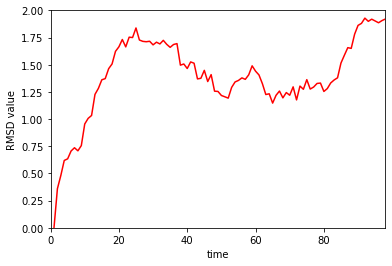

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
li1=[]
li2=[]
rmsd_value=[]
for i in range(len(results)):

    li1.append(results[i][0])
    li2.append(results[i][1])
# print(li1)
# print(li2)
plt.plot(li1,li2,'r')
plt.xlabel("time")
plt.ylabel("RMSD value")
plt.axis([0.0,98.0,0.0,2.0])
plt.show()

